<a href="https://colab.research.google.com/github/chaitra-code/AI-Champ-codes/blob/main/Thermal_Screening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Video Source: http://csr.bu.edu/BU-TIV/BUTIV.html
# !wget http://csr.bu.edu/BU-TIV/data/lab1/video/test_seq1_red.mp4

# Image from the video
!wget https://raw.githubusercontent.com/feat7/thermal-screening/master/data/original.png

--2021-05-16 11:27:04--  https://raw.githubusercontent.com/feat7/thermal-screening/master/data/original.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168355 (164K) [image/png]
Saving to: ‘original.png’

original.png        100%[===================>] 164.41K  --.-KB/s    in 0.04s   

2021-05-16 11:27:04 (3.86 MB/s) - ‘original.png’ saved [168355/168355]



In [2]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def read_image(image_path):
    image = cv2.imread(image_path)
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

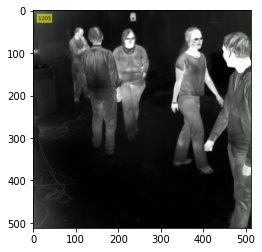

In [5]:
image = read_image("original.png")
plt.imshow(image)

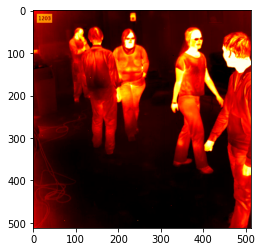

In [6]:
heatmap_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
heatmap = cv2.applyColorMap(heatmap_gray, cv2.COLORMAP_HOT)
heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

plt.imshow(heatmap)

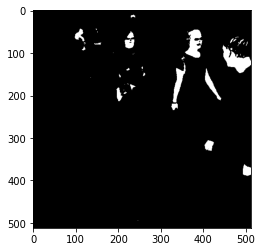

In [7]:
heatmap_gray = cv2.cvtColor(heatmap, cv2.COLOR_RGB2GRAY)
ret, binary_thresh = cv2.threshold(heatmap_gray, 200, 255, cv2.THRESH_BINARY)
plt.imshow(binary_thresh, cmap='gray')

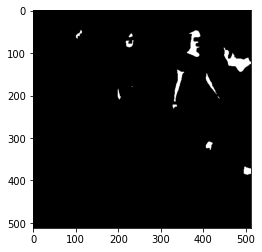

In [ ]:
kernel = np.ones((5, 5), np.uint8)
image_erosion = cv2.erode(binary_thresh, kernel, iterations=1)
image_opening = cv2.dilate(image_erosion, kernel, iterations=1)

plt.imshow(image_opening, cmap='gray')

(246.8805031446541, 0.0, 0.0, 0.0)


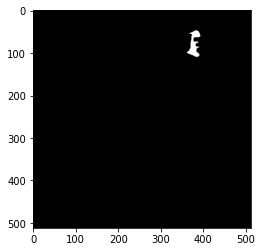

In [ ]:
contours, _ = cv2.findContours(image_opening, 1, 2)

contour = contours[11]
mask = np.zeros_like(heatmap_gray)
x, y, w, h = cv2.boundingRect(contour)
mask[y:y+h, x:x+w] = image_opening[y:y+h, x:x+w]
print(cv2.mean(heatmap_gray, mask=mask))
plt.imshow(mask, cmap='gray')

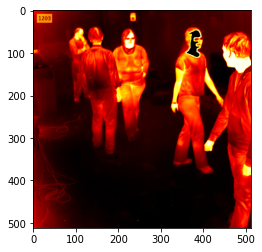

In [ ]:
masked = cv2.bitwise_and(heatmap, heatmap, mask=~mask)
plt.imshow(masked)

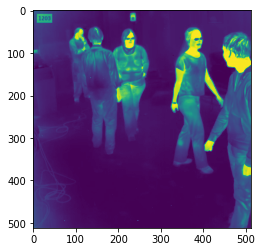

In [ ]:
plt.imshow(heatmap_gray)

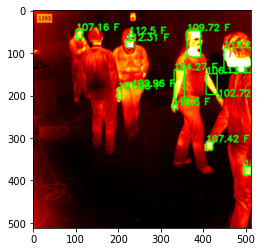

In [ ]:
image_with_rectangles = np.copy(heatmap)

for contour in contours:
    # rectangle over each contour
    x, y, w, h = cv2.boundingRect(contour)

    # Mask is boolean type of matrix.
    mask = np.zeros_like(heatmap_gray)
    mask[y:y+h, x:x+w] = image_opening[y:y+h, x:x+w]

    # Temperature calculation
    temp = round(cv2.mean(heatmap_gray, mask=mask)[0] / 2.25, 2)

    # Draw rectangles for visualisation
    image_with_rectangles = cv2.rectangle(
        image_with_rectangles, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
    # Write temperature for each rectangle
    cv2.putText(image_with_rectangles, f"{temp} F", (x, y),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2, cv2.LINE_AA)

plt.imshow(image_with_rectangles)